In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [2]:
bankdata = pd.read_csv('/Users/fedebehrens/Downloads/bank-marketing/bank-additional-full.csv', ';')

In [3]:
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bankdata.select_dtypes(np.int64).nunique()

age           78
duration    1544
campaign      42
pdays         27
previous       8
dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

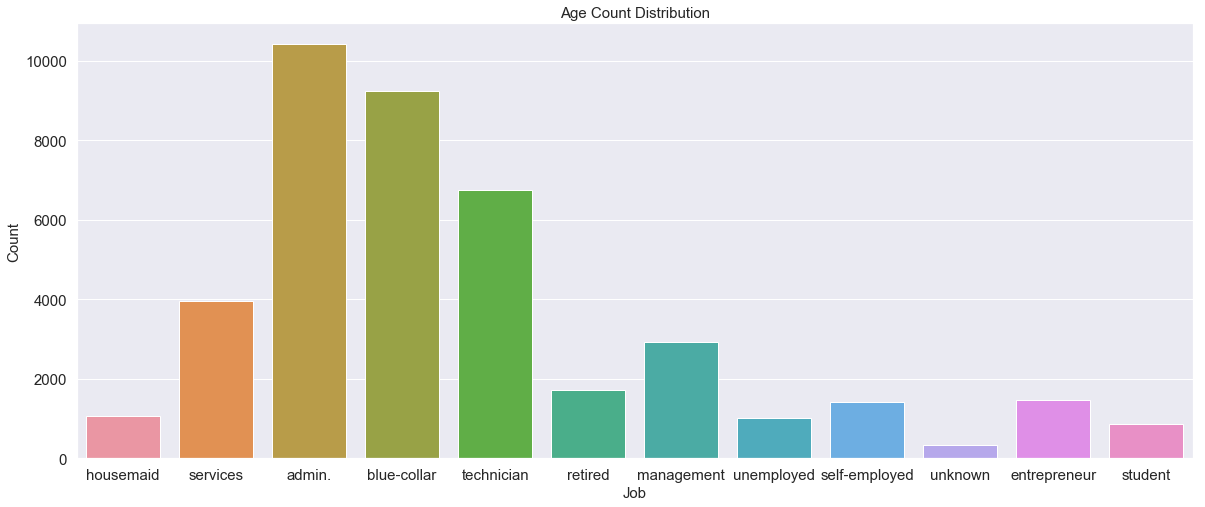

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data=bankdata)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

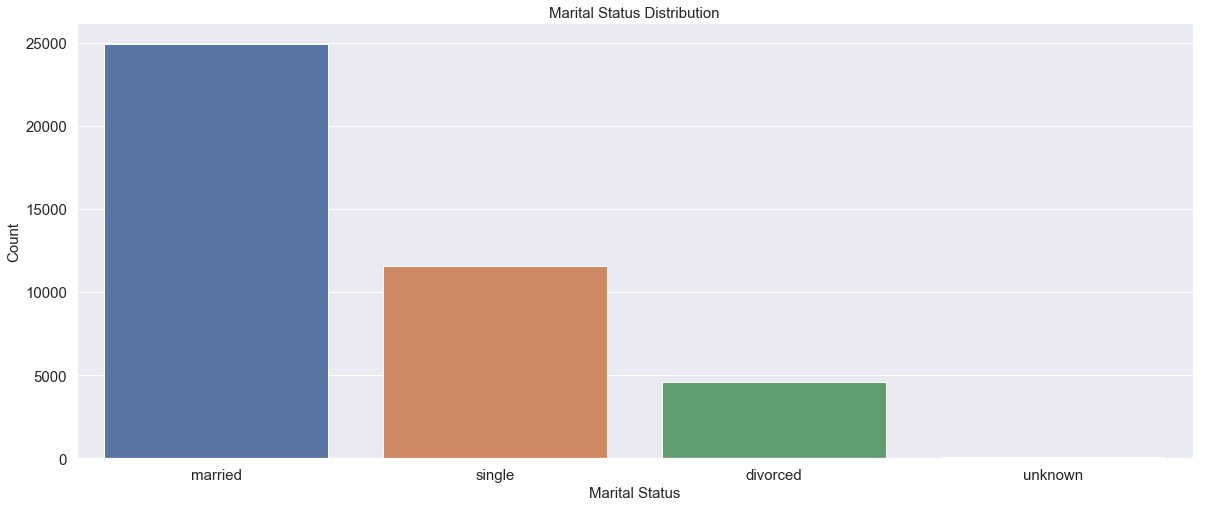

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data=bankdata)
ax.set_xlabel('Marital Status', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Marital Status Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

ValueError: Neither the `x` nor `y` variable appears to be numeric.

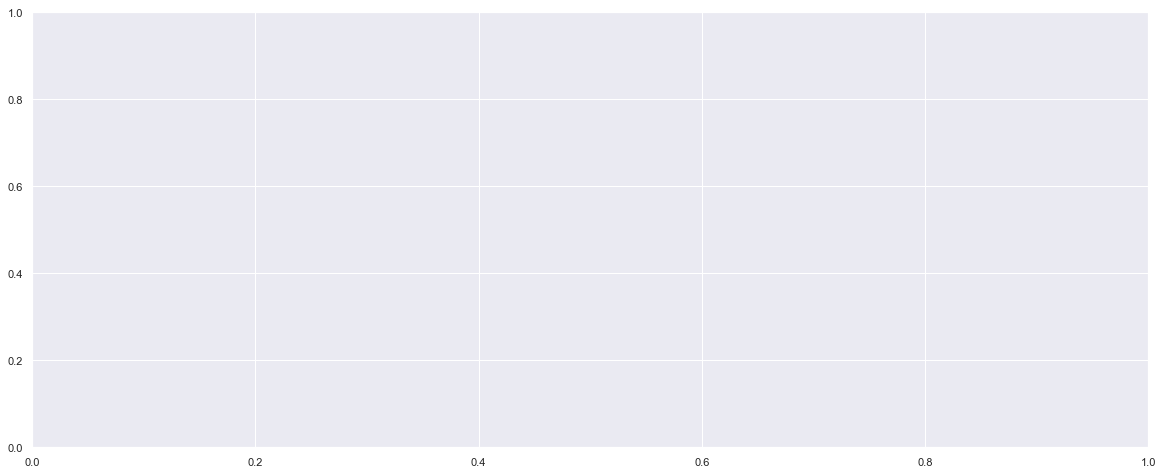

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.violinplot(x='marital', y='y', data=bankdata);
plt.title('Marital Status/Deposit Distribution'); plt.xlabel('Marital Status'); plt.ylabel('y')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data=bankdata)
ax.set_xlabel('Education', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Education Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine

In [9]:
# Create correlation matrix
corr_matrix = bankdata.corr()

In [10]:
mapping = {"yes": 1, "no": 0}
bankdata['y'] = bankdata['y'].replace(mapping).astype(np.float64)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


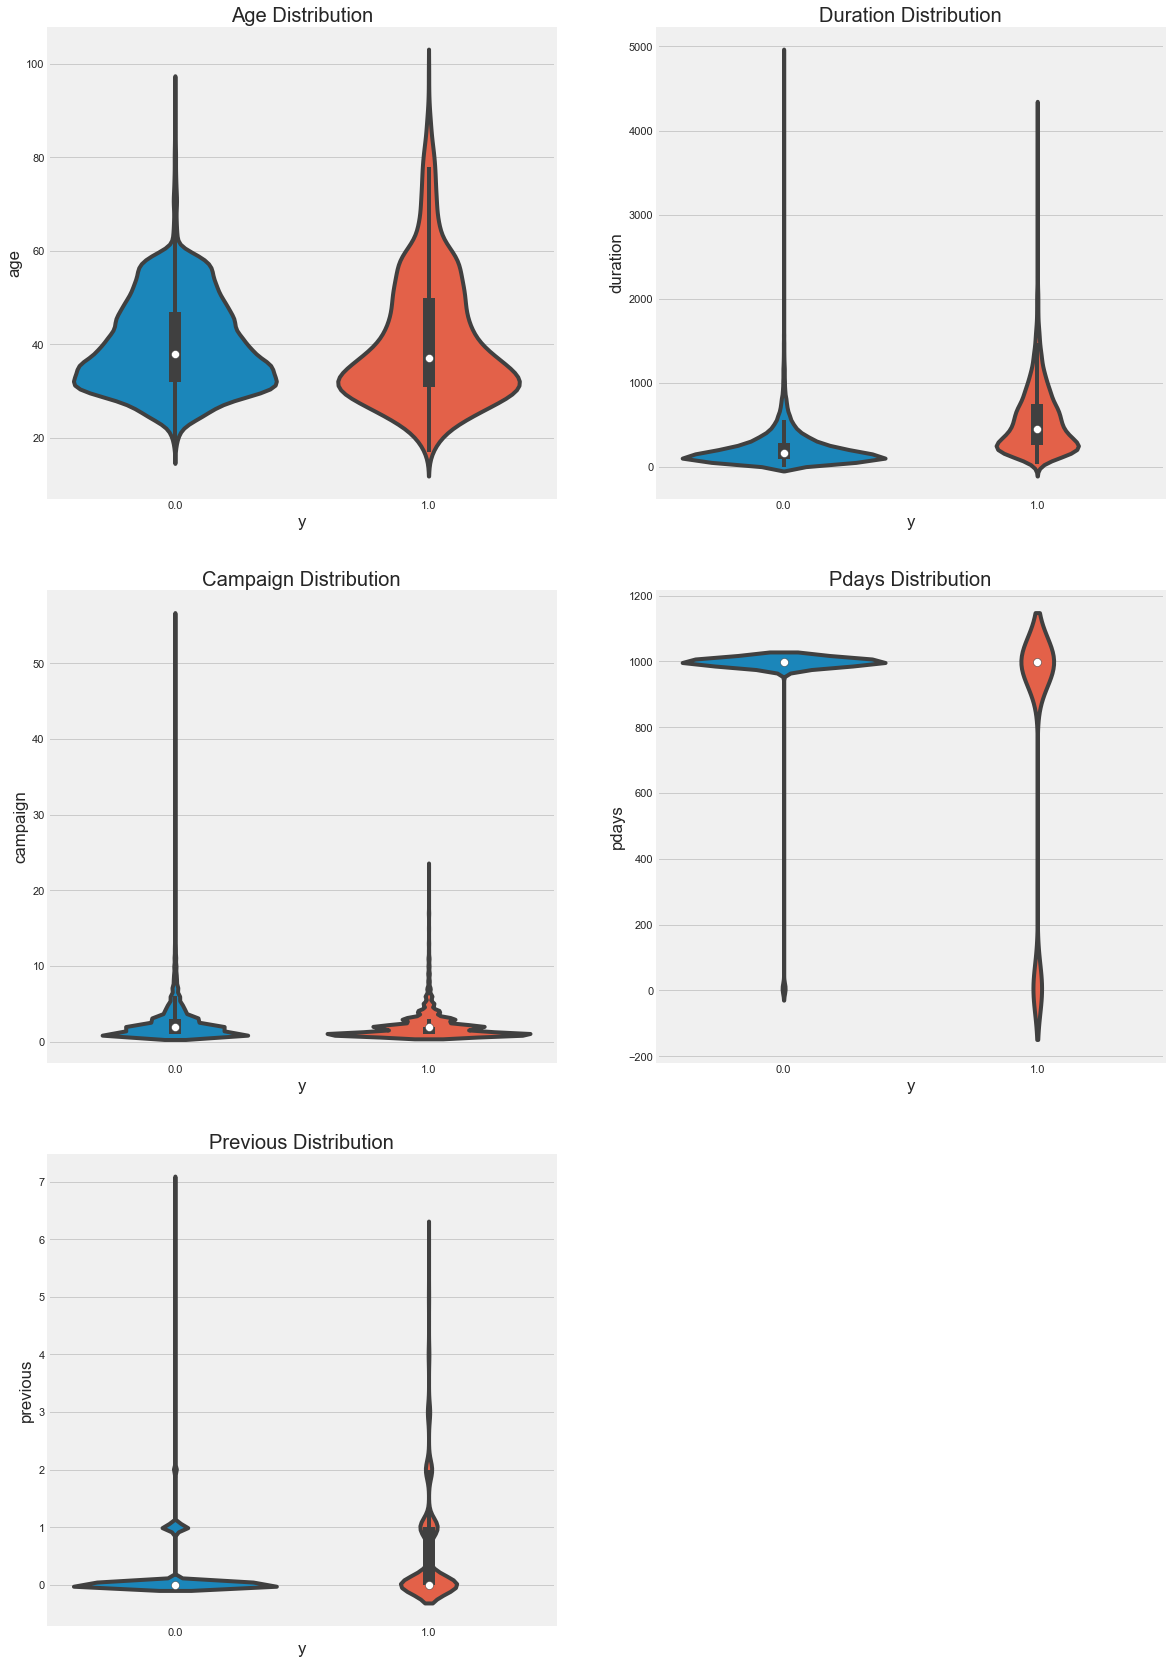

In [11]:
#violin plot to evaluate duration values and outcomes of int64

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(bankdata.select_dtypes(np.int64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=bankdata);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         4640.]),
 array([0.        , 0.05882353, 0.11764706, 0.17647059, 0.23529412,
        0.29411765, 0.35294118, 0.41176471, 0.47058824, 0.52941176,
        0.58823529, 0.64705882, 0.70588235, 0.76470588, 0.82352941,
        0.88235294, 0.94117647, 1.        ]),
 <a list of 17 Patch objects>)

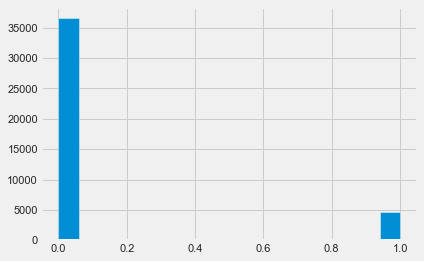

In [12]:
#analysing the label
plt.hist(bankdata['y'], bins='auto')

In [13]:
bankdata.select_dtypes(np.float64).nunique()

emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


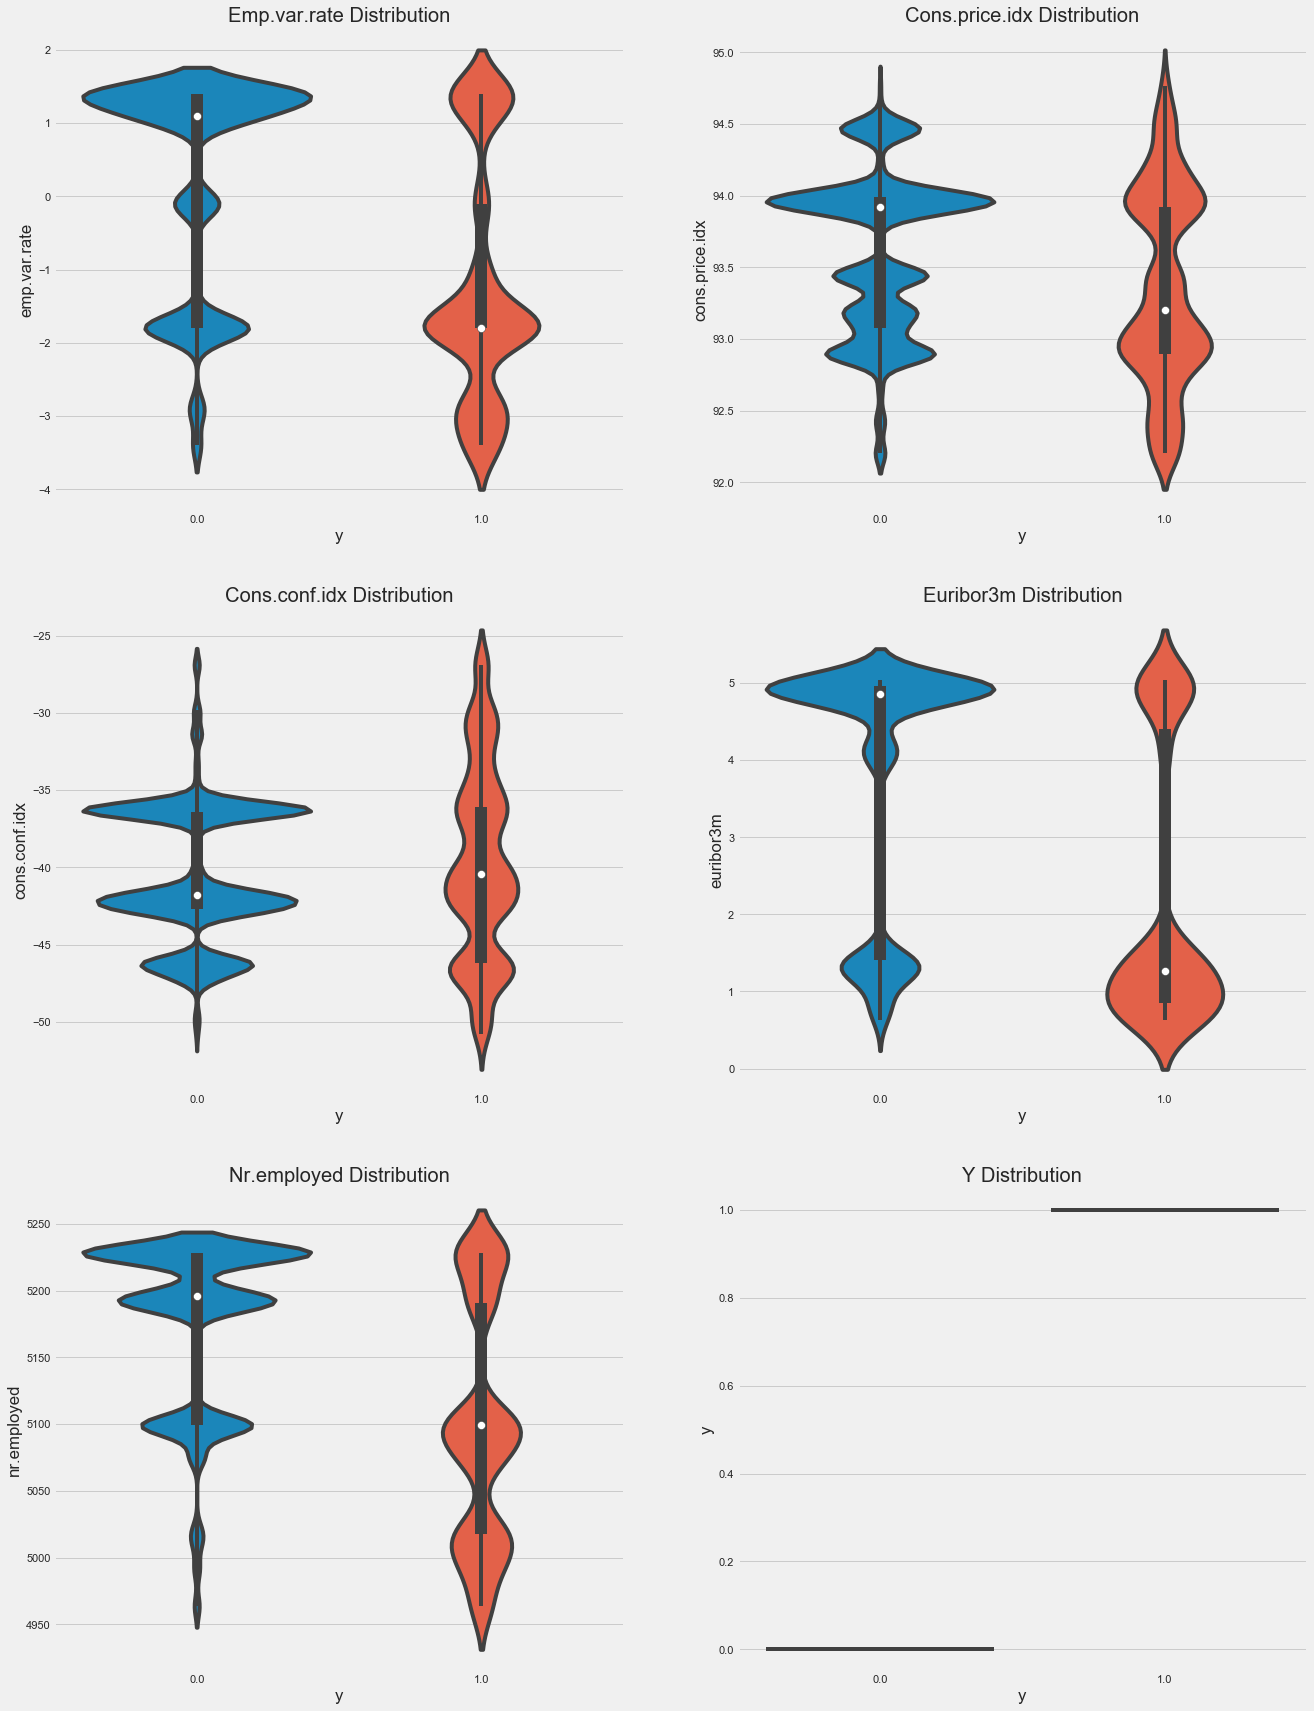

In [14]:
#violin plot to evaluate duration values and outcomes of floats

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(bankdata.select_dtypes(np.float64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=bankdata);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

In [15]:
#get dummy variables for categorical data
df = bankdata[['job', 'marital', 'education', 'poutcome']]

dummiesdf = pd.get_dummies(df)

dummiesdf.shape

(41188, 27)

In [16]:
#mapping boolean data to 0/1

mapping = {"yes": 1, "no": 0, 'unknown': 2}

bankdata['default'] = bankdata['default'].replace(mapping).astype(np.float64)
bankdata['housing'] = bankdata['housing'].replace(mapping).astype(np.float64)
bankdata['loan'] = bankdata['loan'].replace(mapping).astype(np.float64)

In [17]:
mapping = {"failure": 0, "nonexistent": 1, 'success': 2}

bankdata['poutcome'] = bankdata['poutcome'].replace(mapping).astype(np.float64)

In [18]:
bankdata.shape

(41188, 21)

In [19]:
finaldf = pd.concat([bankdata[['poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], dummiesdf], axis=1)

In [20]:
finaldf.fillna(0)

,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1.0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,1.0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,1.0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
8,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
#split train & test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldf, bankdata['y'], test_size=0.33, random_state = 32)

print(finaldf.shape)
print(bankdata['y'].shape)
print(bankdata.shape)
print(y_train)

(41188, 33)
(41188,)
(41188, 21)
28579    1.0
3241     0.0
26614    1.0
39423    1.0
4195     0.0
9139     0.0
4201     0.0
30319    1.0
12779    0.0
20286    0.0
15399    0.0
36882    0.0
31589    0.0
26064    0.0
37932    0.0
20552    0.0
16703    0.0
31954    0.0
5389     0.0
25242    0.0
32886    0.0
11926    0.0
1747     0.0
25222    0.0
32237    0.0
27430    1.0
22135    0.0
7547     0.0
35867    0.0
28843    0.0
        ... 
32832    0.0
34543    0.0
22749    0.0
18906    0.0
4491     0.0
38667    0.0
25766    0.0
4345     0.0
24761    0.0
32868    0.0
19890    0.0
2004     0.0
8842     0.0
32338    0.0
9770     0.0
29464    0.0
8227     0.0
17826    0.0
10817    0.0
9475     0.0
24203    0.0
37892    0.0
40969    0.0
25834    0.0
39513    1.0
19527    0.0
24828    0.0
20414    0.0
9526     0.0
10967    0.0
Name: y, Length: 27595, dtype: float64


In [22]:
#evaluating first attempt
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])
train_set = pipeline.fit_transform(X_train)
test_set = pipeline.transform(X_test)
train_labels = y_train

features = list(finaldf.columns)
print(train_set)

[[0.5        0.33333333 0.34060795 ... 0.         1.         0.        ]
 [0.5        0.9375     0.69875292 ... 0.         1.         0.        ]
 [0.5        0.6875     0.3893219  ... 0.         1.         0.        ]
 ...
 [0.5        1.         0.48441154 ... 0.         1.         0.        ]
 [0.5        1.         0.88230709 ... 0.         1.         0.        ]
 [0.5        1.         0.88230709 ... 0.         1.         0.        ]]


In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)

## 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.6519 with std = 0.0129


In [25]:
model.fit(train_set, train_labels)

RFCpred = model.predict(X_test)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

import collections
collections.Counter(RFCpred)

Counter({0.0: 13169, 1.0: 424})

In [26]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

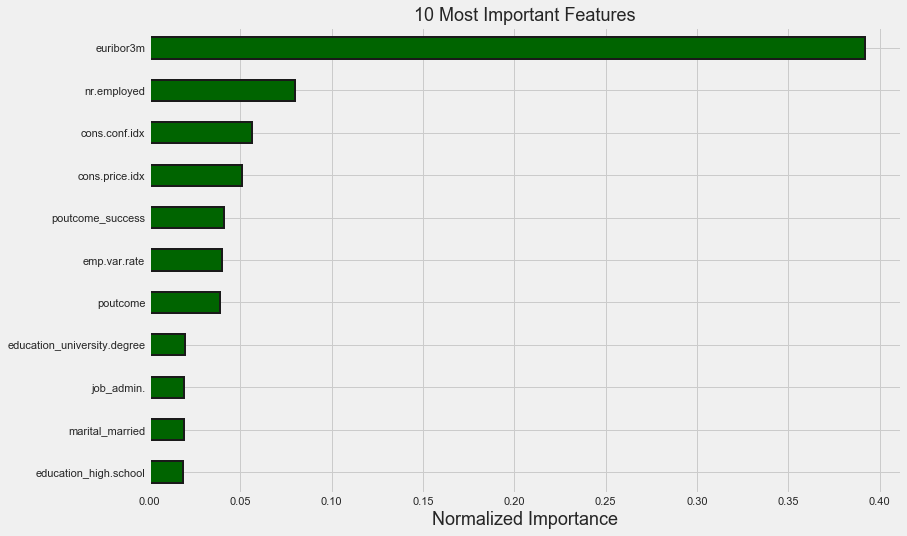

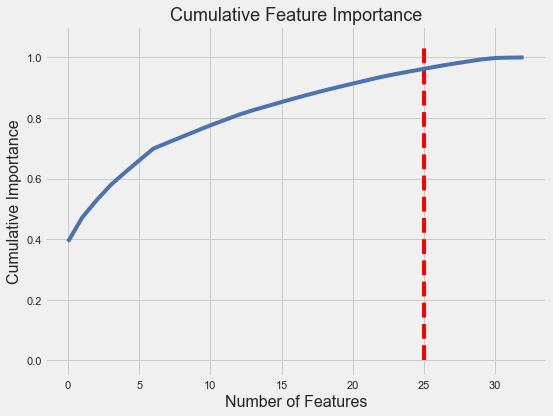

25 features required for 95% of cumulative importance.


In [27]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [28]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [29]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [30]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.61902 with std: 0.01273


In [31]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.63086 with std: 0.0133


In [32]:
model_results = cv_model(train_set, train_labels, RandomForestClassifier(), 
                         'RFC', model_results)


print(model_results)

10 Fold CV Score: 0.64301 with std: 0.0146
  model   cv_mean    cv_std
0  LSVC  0.619022  0.012726
1   GNB  0.630857  0.013299
2   RFC  0.643011  0.014604


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

#confmatrix = (y_test[:1], RFCpred)

y_testpd = pd.Series(y_test)

confmatrix = (y_test, RFCpred)

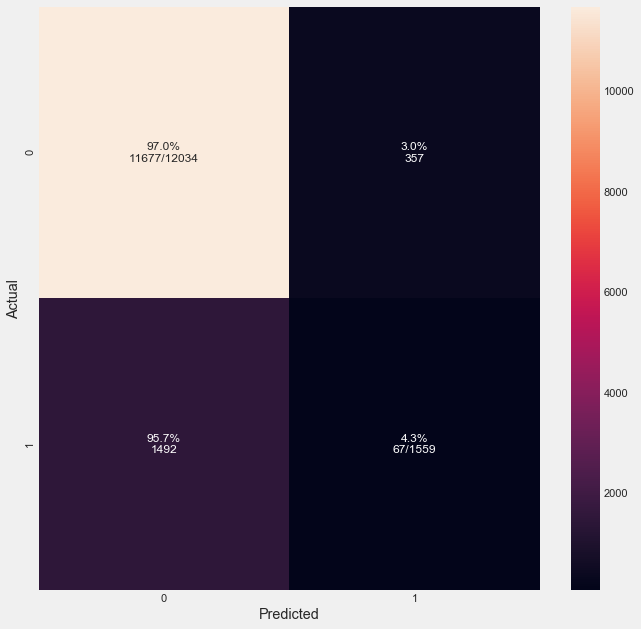

In [34]:
cm = confusion_matrix(y_test, RFCpred)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(cm)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=annot, fmt='', ax=ax)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11897   137]
 [ 1302   257]]
89.0


In [37]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[12034     0]
 [ 1559     0]]
89.0


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11506   528]
 [ 1120   439]]
88.0


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11567   467]
 [ 1109   450]]
88.0


In [40]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10324  1710]
 [  831   728]]
81.0


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11852   182]
 [ 1216   343]]
90.0


In [43]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,Gradient Boosting,0.900163
3,Logistic Model,0.899837
2,Support Vector Machine,0.888349
0,Random Forest Classifier,0.886320
1,Decision Tree Classifier,0.882732
4,Gausian NB,0.819604
